In [1]:
# linear algebra
import numpy as np

# data preprocessing, CSV file I/O
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix


In [ ]:
from subprocess import check_output
print(check_output(["ls", ""]).decode("utf8"))

In [2]:
# load the dataset
irisData = pd.read_csv("Iris.csv")

# Show the first few rows in the dataset
irisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


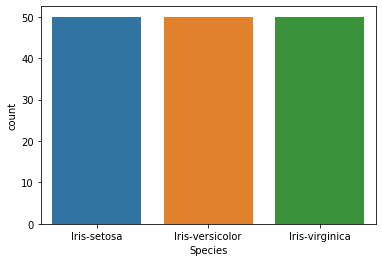

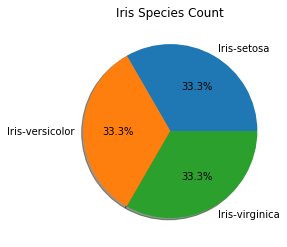

In [3]:
# Check if the data is consistent. Check for null values or missing values

irisData.info()
irisData.describe()

# Group by species and take count.
irisData['Species'].value_counts()

# Draw a plot to see the count of values of each species.
sns.countplot('Species', data = irisData)
plt.show()

# Lets draw a pie chart
# irisData['Species'].value_counts().plot.pie(
#                                             autopct='%1.1f%%',
#                                            shadow=True,
#                                            figsize=(10, 8),
#                                             title='Iris Species Count')

plt.pie(irisData['Species'].value_counts(), autopct='%1.1f%%', shadow=True,
       labels = irisData['Species'].unique())
plt.title('Iris Species Count')
plt.show()

In [4]:
# Dropping the Id column as it is of no use to us.
# axis = 1 means that the drop should be column wise.
# inplace = True means that the changes should be reflected in our dataframe.

irisData.drop('Id', axis = 1, inplace = True)

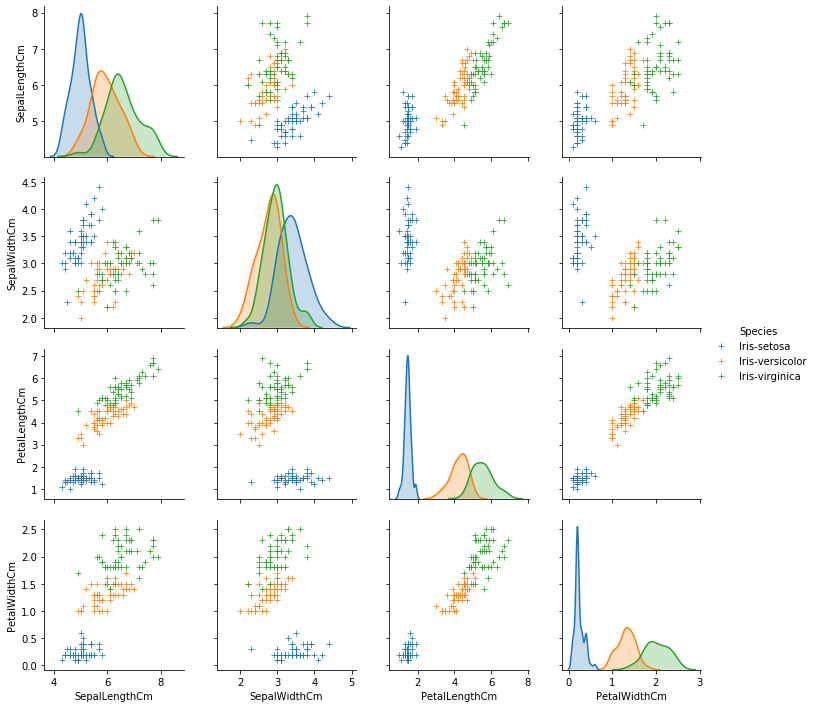

In [6]:
# Now lets do some data analysis using plots.

# Pair plot
'''
The pair plot builds on two basic figures, the histogram and the scatter plot.
The histogram on the diagonal allows us to see the distribution of a single variable
while the scatter plot on the upper and lower triangles show the relationship 
(or lack thereof) between two variables.
'''


irisPairPlot = sns.pairplot(irisData, hue='Species', markers='+')
plt.show()

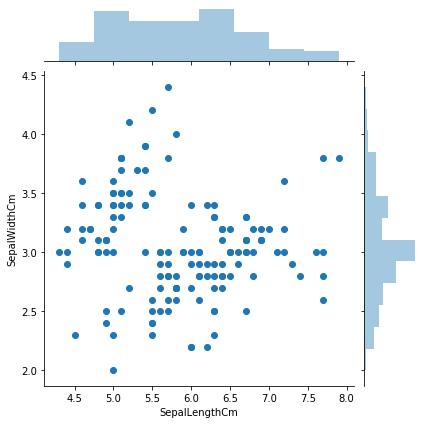

In [7]:
# Joint Plot
'''
Jointplot is seaborn library specific and can be used to quickly visualize 
and analyze the relationship between two variables while also describing 
their individual distributions on the same plot.
'''

jointPlot = sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=irisData)

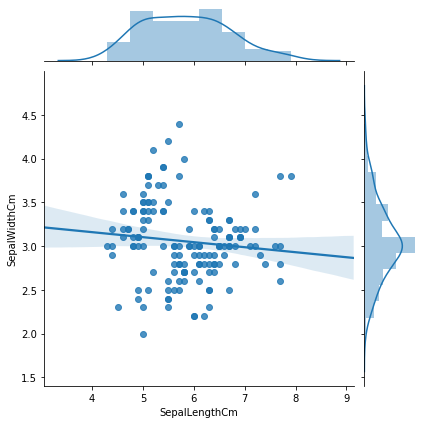

In [8]:
# A joint plot with a regression line
regJointPlot = sns.jointplot('SepalLengthCm', 'SepalWidthCm', data=irisData, kind='reg')

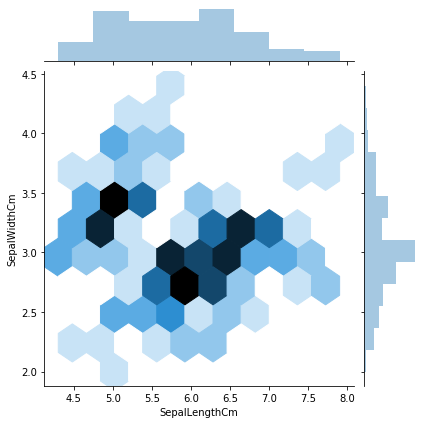

In [9]:
# A hexadecimal joint plot
# Darker the color more the distribution in that area.
hexJointPlot = sns.jointplot(x = 'SepalLengthCm', 
                             y = 'SepalWidthCm', 
                             data = irisData,
                            kind='hex')


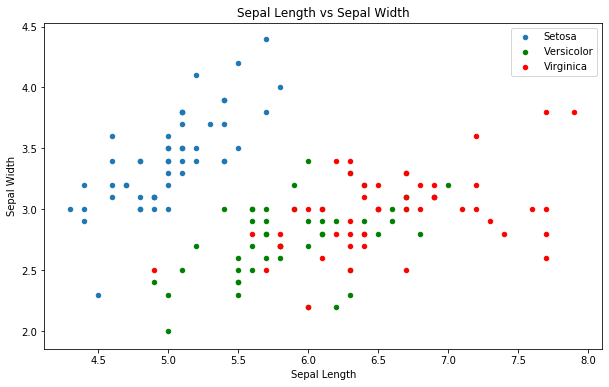

In [10]:

# First lets compare sepal length and sepal width.

sepLenWdthPlt = irisData[irisData.Species=='Iris-setosa'].plot(kind='scatter', 
                                                            x = 'SepalLengthCm',
                                                           y = 'SepalWidthCm',
                                                            label = 'Setosa')
irisData[irisData.Species=='Iris-versicolor'].plot(kind='scatter',
                                                  x = 'SepalLengthCm',
                                                  y='SepalWidthCm',
                                                   color = 'green',
                                                  label = 'Versicolor', ax=sepLenWdthPlt)
irisData[irisData.Species=='Iris-virginica'].plot(kind='scatter',
                                                 x = 'SepalLengthCm',
                                                 y = 'SepalWidthCm',
                                                 color = 'red',
                                                 label = 'Virginica', ax = sepLenWdthPlt)
sepLenWdthPlt.set_xlabel('Sepal Length')
sepLenWdthPlt.set_ylabel('Sepal Width')
sepLenWdthPlt.set_title('Sepal Length vs Sepal Width')
sepLenWdthPlt = plt.gcf()
sepLenWdthPlt.set_size_inches(10, 6)

plt.show()

In [11]:
# From the above plot we can see that clear clusters are not visible 
# when we take the sepal into account

# Now lets compare petal length and petal width

<function matplotlib.pyplot.show(*args, **kw)>

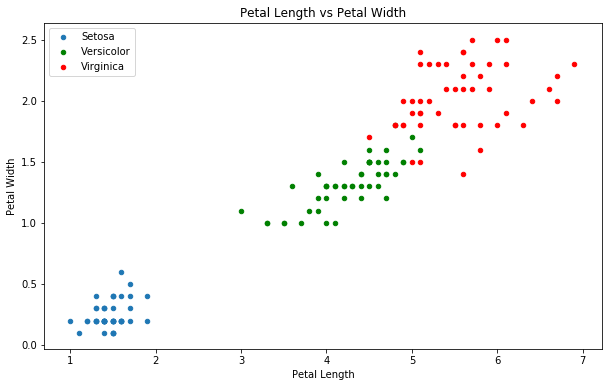

In [12]:
petLenWdthPlt = irisData[irisData.Species=='Iris-setosa'].plot.scatter(
                                                        x='PetalLengthCm',
                                                        y = 'PetalWidthCm',
                                                        label = 'Setosa')
irisData[irisData.Species=='Iris-versicolor'].plot.scatter(
                                                        x='PetalLengthCm',
                                                        y = 'PetalWidthCm',
                                                        label = 'Versicolor', 
                                                        color = 'green',
                                                        ax=petLenWdthPlt)
irisData[irisData.Species == 'Iris-virginica'].plot.scatter(
                                                        x = 'PetalLengthCm',
                                                        y = 'PetalWidthCm',
                                                        label='Virginica',
                                                        color='red',
                                                        ax = petLenWdthPlt)

petLenWdthPlt.set_xlabel('Petal Length')
petLenWdthPlt.set_ylabel('Petal Width')
petLenWdthPlt.set_title('Petal Length vs Petal Width')
petLenWdthPlt = plt.gcf()
petLenWdthPlt.set_size_inches(10, 6)
plt.show

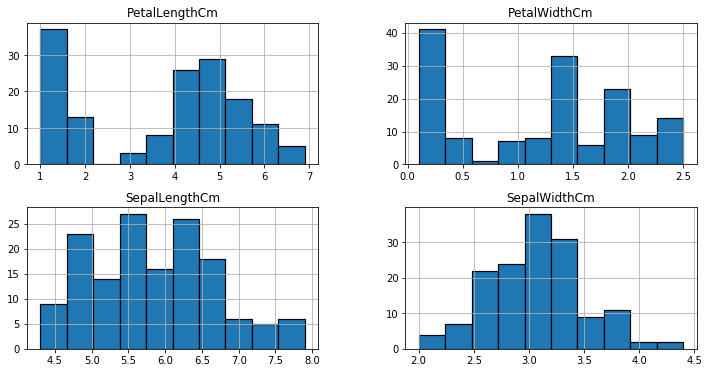

In [13]:
# When we plot the petal, we get a better cluster division. 
# Hence we can say that the Petals can help in better and accurate predictions 
# instead of the Sepal. We will confirm that later.

# Now let us see how the length and width are distributed.

irisData.hist(edgecolor='black', linewidth=1.2)
lenWdthHist = plt.gcf()
lenWdthHist.set_size_inches(12, 6)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012A3BC22C48>,
      dtype=object)

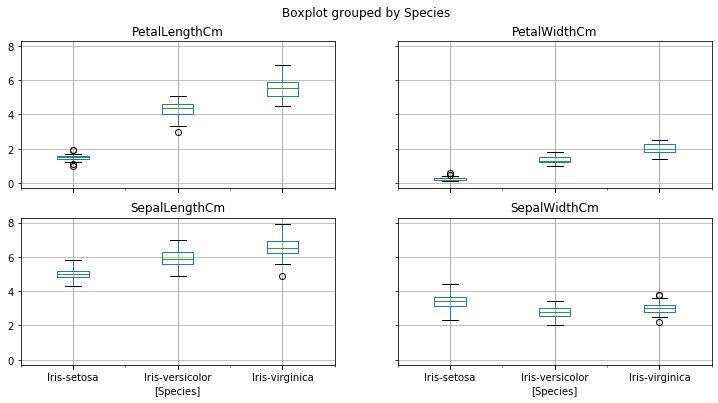

In [14]:
# Boxplot or whisker plot
'''
Using a boxplot we display the distribution if data based on five things:
1) "minimum" value
2) first quartile
3) median
4) third quartile
5) "maximum" value

It lets us know if there are any outliers, how symmetrical our data is 
and how tightly grouped our data is
'''
irisData.boxplot(by='Species', figsize=(12, 6))


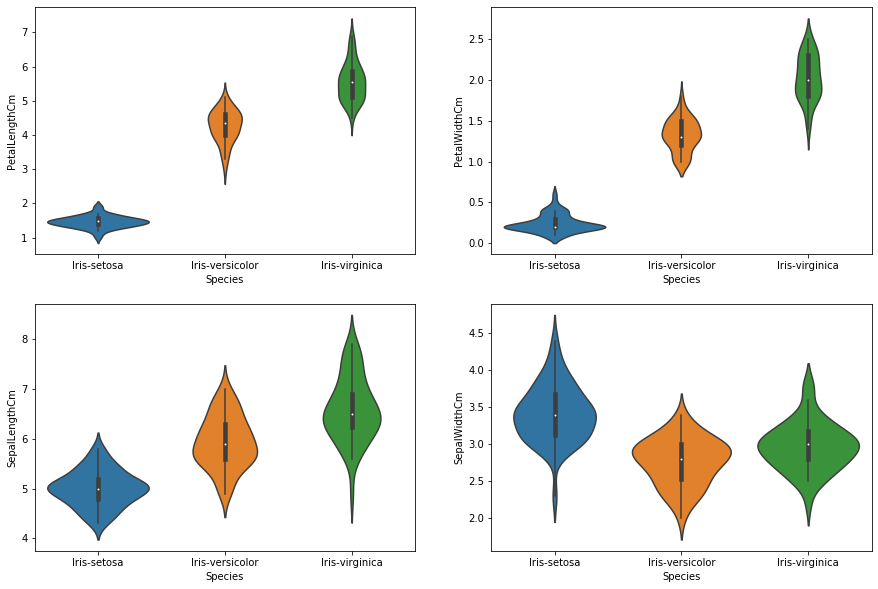

In [15]:
# Now lets see how the length and width vary according to the species.

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = irisData)

plt.subplot(2, 2, 2)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = irisData)

plt.subplot(2, 2, 3)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = irisData)

plt.subplot(2, 2, 4)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = irisData)

In [16]:
# The violinplot shows density of the length and width in the species. 
# The thinner part denotes that there is less density whereas the fatter part 
# tells us that there is higher density.

# Features : Petal Length, Petal Width
#            Sepal Length, Sepal Width

# Target Variable : Species

In [17]:
# Lets import the necessary packages to use 
# the various classification algorithms

# To split the dataset into testing and training
from sklearn.model_selection import train_test_split


# for checking the model accuracy
from sklearn import metrics

# for K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

# for Support Vector Machine (SVM) 
from sklearn import svm

# for using Decision Tree 
from sklearn.tree import DecisionTreeClassifier

# for logistic regression
from sklearn.linear_model import LogisticRegression

# for Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB


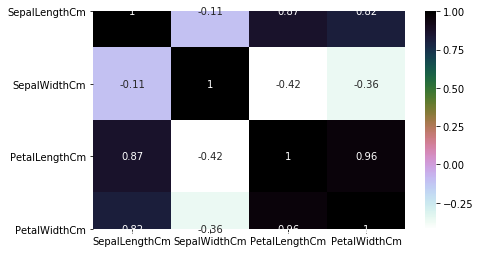

In [18]:
# When we train any algorithm, the number of features and their correlation plays
# an important role. If there are featire and many of the features are highlu correlated,
# then training an algorithm with all the features will reduce the accuracy.
# Thus features selection should be done carefully.This dataset has less features,
# but still we will see the correlation

plt.figure(figsize=(7, 4))
# draws heatmap with input as the correlation matrix calculated by (iris.corr())
sns.heatmap(irisData.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [19]:
# The Sepal Width and Length are not correlated. 
# The Petal Width and Length are highly correlated.
# We will use all the features for training the algorithm and check the accuracy.
# Then we will use 1 Petal fature and 1 Sepal feature to check the accuracy of the
# algorith, as we are using only 2 features that are not correlated.
# Thus we can have a variane on the dataset which may help in better accuracy
# which we will check later.

# Lets split the data into training and test dataset

# the attribuet test_size = 0.3 splits the data into 70% training data 
# and 30% test data
train, test = train_test_split(irisData, test_size = 0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [20]:
# taking the training data features
trainX = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Output of our training data
trainY = train.Species

# taking test data features
testX = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# output value of test data
testY = test.Species

In [21]:
# Lets check the train and test dataset.

trainX.head()
testX.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
123,6.3,2.7,4.9,1.8
124,6.7,3.3,5.7,2.1
34,4.9,3.1,1.5,0.1
56,6.3,3.3,4.7,1.6
127,6.1,3.0,4.9,1.8


The accuracy of the SVM is :  1.0


C:\Users\nachi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


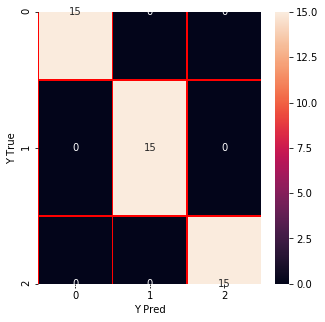

In [22]:
# Support Vector Machine 
'''
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimenional 
space that distinctly classifies the data points.
To separate the two classe of data points, there are many possible hyperplanes that could be chosen
'''

svmModel = svm.SVC()

# we train the SVM algorithm with the training data 
# and training output
svmModel.fit(trainX, trainY)

# Now we pass the testing data to the trained algorithm
svmPrediction = svmModel.predict(testX)

print('The accuracy of the SVM is : ', metrics.accuracy_score(svmPrediction, testY))

cmSVM = confusion_matrix(testY, svmPrediction)

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cmSVM, annot=True, linewidths=0.5, 
            linecolor='red', fmt = '.0f',
           ax = ax)
plt.xlabel('Y Pred')
plt.ylabel('Y True')
plt.show()

C:\Users\nachi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nachi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the Logistic Regression is :  0.9777777777777777


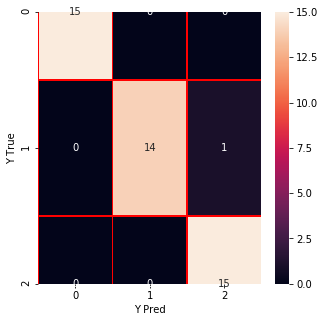

In [23]:
# SVM is giving good accuracy. Lets check for other models.

# Logistic Regression

lgstRgModel = LogisticRegression()
lgstRgModel.fit(trainX, trainY)
lgstRgPrediction = lgstRgModel.predict(testX)

print('The accuracy of the Logistic Regression is : ', 
      metrics.accuracy_score(lgstRgPrediction, testY))

cmLogReg = confusion_matrix(testY, lgstRgPrediction)

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cmLogReg, annot=True, linewidths=0.5, 
            linecolor='red', fmt = '.0f',
           ax = ax)
plt.xlabel('Y Pred')
plt.ylabel('Y True')
plt.show()

The accuracy of the Decision Tree Model is :  0.9555555555555556


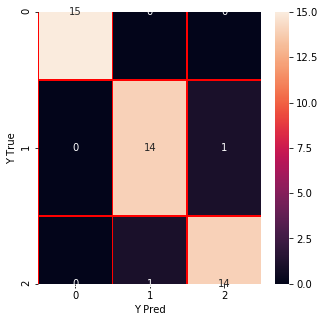

In [24]:
# Logistic Regression is also giving good results.

# Decision Tree

deciTreeModel = DecisionTreeClassifier()
deciTreeModel.fit(trainX, trainY)
deciTreePred = deciTreeModel.predict(testX)

print('The accuracy of the Decision Tree Model is : ', 
      metrics.accuracy_score(deciTreePred, testY))

cmDecTree = confusion_matrix(testY, deciTreePred)

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cmDecTree, annot=True, linewidths=0.5, 
            linecolor='red', fmt = '.0f',
           ax = ax)
plt.xlabel('Y Pred')
plt.ylabel('Y True')
plt.show()

The accuracy of the KNN Model is :  0.9777777777777777


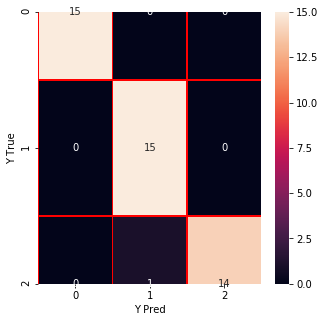

In [25]:
# The result of Decision tree is same as Logistic Regression

# This will have 3 neighbors for putting the new data into a class
knnModel = KNeighborsClassifier(n_neighbors=3)

knnModel.fit(trainX, trainY)
knnPred = knnModel.predict(testX)

print('The accuracy of the KNN Model is : ', 
      metrics.accuracy_score(knnPred, testY))

cmKNN = confusion_matrix(testY, knnPred)

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cmKNN, annot=True, linewidths=0.5, 
            linecolor='red', fmt = '.0f',
           ax = ax)
plt.xlabel('Y Pred')
plt.ylabel('Y True')
plt.show()

The accuracy of the Naive Bayes Model is :  0.9555555555555556


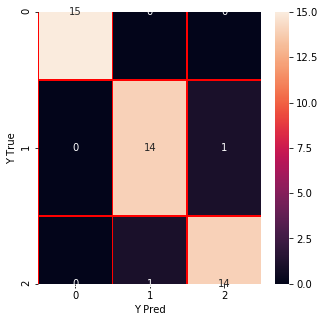

In [26]:
# Naive Bayes Classification

naiBayModel = GaussianNB()
naiBayModel.fit(trainX, trainY)

naiBayPred = naiBayModel.predict(testX)

print('The accuracy of the Naive Bayes Model is : ', 
      metrics.accuracy_score(naiBayPred, testY))

cmNB = confusion_matrix(testY, naiBayPred)

f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(cmNB, annot=True, linewidths=0.5, 
            linecolor='red', fmt = '.0f',
           ax = ax)
plt.xlabel('Y Pred')
plt.ylabel('Y True')
plt.show()